In [4]:
% matplotlib inline
import os
import random

import pandas as pd
from scipy.misc import imread

In [18]:
% pwd
% cd ..

/Users/gokulnathpillai/Documents/Projects/Age Detection


In [19]:
home = os.getcwd()
home

'/Users/gokulnathpillai/Documents/Projects/Age Detection'

In [25]:
root_dir = os.path.abspath('.')
test_dir = os.path.join(os.getcwd(), 'Test')
train_dir = os.path.join(os.getcwd(), 'Train')
test_dir

'/Users/gokulnathpillai/Documents/Projects/Age Detection/Test'

In [145]:
train = pd.read_csv(os.path.join(train_dir, 'train.csv'))
test = pd.read_csv(os.path.join(test_dir, 'test.csv'))


In [146]:
i = random.choice(train.index)

img_name = train.ID[i]


# img = imread(os.path.join(data_dir, 'Train', img_name))
img = imread(os.path.join(train_dir, 'Train', img_name))

print("Age:", train.Class[i])



Age: YOUNG


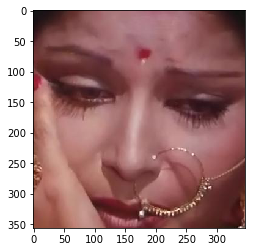

In [147]:
imshow(img)

### Since there are variations in the image sizes, we have to resize all of them to the same size:

In [148]:
from scipy.misc import imresize

temp = []

for img_name in train.ID:
    img_path = os.path.join(train_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32,32))
    img = img.astype("float32")
    temp.append(img)
    
train_x = np.stack(temp)

In [149]:
temp1 = []

for img_name in test.ID:
    img_path = os.path.join(test_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32,32))
    img = img.astype("float32")
    temp1.append(img)
    
test_x = np.stack(temp1)

In [150]:
train_x = train_x /255
test_x = test_x /255

In [152]:
# Checking the class value

train.Class.value_counts(normalize= True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64


### We see that the majority of the images fall in the "MIDDLE" class

### Converting the target into dummy columns:

In [157]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

train_y.shape

(19906, 3)

In [62]:
input_num_units = (32, 32, 3) # Since we resized our images to 32 x 32 with 3 channels
hidden_num_units = 500
output_num_units = 3

epochs = 10
batch_size = 64

In [172]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD


In [223]:
# Building the model : 

model = Sequential()
model.add(Conv2D(1, (3, 3), activation='relu', input_shape=input_num_units))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=hidden_num_units, activation='relu'))
model.add(Dense(units=output_num_units, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


In [224]:
# Model architecture :

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 1)         28        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 1)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 225)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 500)               113000    
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 1503      
Total params: 114,531
Trainable params: 114,531
Non-trainable params: 0
_________________________________________________________________


In [225]:
# Using schotastic gradient descent as an optimiser:

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size, epochs=5, verbose=1)

Epoch 1/5
19906/19906 [==============================] - 3s - loss: 0.8672 - acc: 0.5939     

In [165]:
# Using adam optimiser:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size, epochs=1, verbose=1)

Epoch 1/1
19906/19906 [==============================] - 7s - loss: 0.7750 - acc: 0.6536     

In [166]:
# Using rmsprop

model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size, epochs=1, verbose=1)

Epoch 1/1
19906/19906 [==============================] - 6s - loss: 0.7783 - acc: 0.6496     

In [68]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=1, verbose = 1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/1
15924/15924 [==============================] - 44s - loss: 0.7317 - acc: 0.6740 - val_loss: 0.7320 - val_acc: 0.6730

5920/6636 [=========================>....] - ETA: 0s

array([2, 2, 0, ..., 0, 0, 0])

In [75]:
pred = lb.inverse_transform(pred)
pred

array(['YOUNG', 'YOUNG', 'MIDDLE', ..., 'MIDDLE', 'MIDDLE', 'MIDDLE'], dtype=object)

In [78]:
# Basic neural network model submission

test['Class'] = pred
test.to_csv("sub02.csv", index=False)